In [84]:
#程式碼取自 博碩, "Python 機器學習", ISBN 978-986-434-140-5, by Sebastian Raschka, 為練習Python函式庫用途
#僅供履歷作品集使用
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
training_epochs = 25
learning_rate = 0.01
batch_size = 100
display_step = 1

x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, 10])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [85]:
activation = tf.nn.softmax(tf.matmul(x, W) + b)
correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
cross_entropy = y * tf.log(activation)
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

avg_set = []
epoch_set = []
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y:batch_ys}) / total_batch
        if epoch % display_step == 0:
            print('Epoch: %04d cost= %.9f' %((epoch+1),avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
        
    print('Training phase finished\n')
    
    print('Model accuracy: %.2f' % sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 1.176217286
Epoch: 0002 cost= 0.662530824
Epoch: 0003 cost= 0.550720267
Epoch: 0004 cost= 0.496784425
Epoch: 0005 cost= 0.463800444
Epoch: 0006 cost= 0.440917448
Epoch: 0007 cost= 0.423920187
Epoch: 0008 cost= 0.410647613
Epoch: 0009 cost= 0.399910327
Epoch: 0010 cost= 0.390966552
Epoch: 0011 cost= 0.383323331
Epoch: 0012 cost= 0.376800214
Epoch: 0013 cost= 0.371058440
Epoch: 0014 cost= 0.365912671
Epoch: 0015 cost= 0.361367968
Epoch: 0016 cost= 0.357296204
Epoch: 0017 cost= 0.353509325
Epoch: 0018 cost= 0.350203863
Epoch: 0019 cost= 0.347072097
Epoch: 0020 cost= 0.344121840
Epoch: 0021 cost= 0.341488622
Epoch: 0022 cost= 0.339015153
Epoch: 0023 cost= 0.336669564
Epoch: 0024 cost= 0.334443140
Epoch: 0025 cost= 0.332459242
Training phase finished

Model accuracy: 0.91


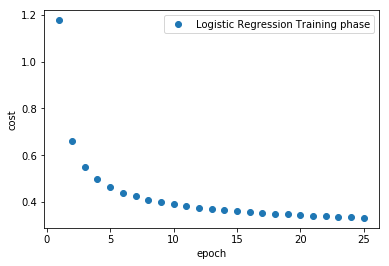

In [86]:
plt.plot(epoch_set, avg_set, 'o', label='Logistic Regression Training phase')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend()
plt.show()